<a href="https://colab.research.google.com/github/VaibhavBhusawale/Time-series-EDA/blob/main/EDA_time_series_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas_datareader as pdr
import pandas as pd          
from datetime import datetime                                                 

In [4]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [5]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()



In [6]:
df_tesla=pdr.get_data_yahoo('TSLA')

[*********************100%***********************]  1 of 1 completed


In [7]:
df_tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-28,840.200012,849.900024,818.400024,842.700012,842.700012,28241000
2022-07-29,842.099976,894.960022,837.299988,891.450012,891.450012,31771000
2022-08-01,903.830017,935.630005,885.000000,891.830017,891.830017,39014300
2022-08-02,882.010010,923.500000,878.000000,901.760010,901.760010,31794000
2022-08-03,882.010010,920.760010,910.000000,918.677917,918.677917,1436022


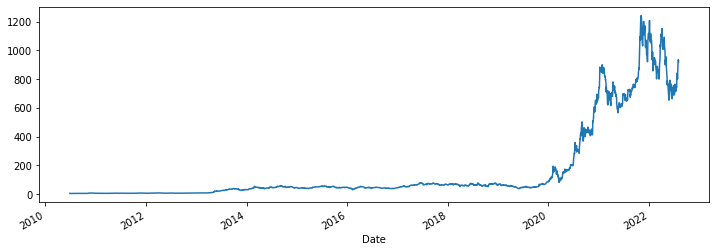

In [8]:
df_tesla['High'].plot(figsize=(12,4))

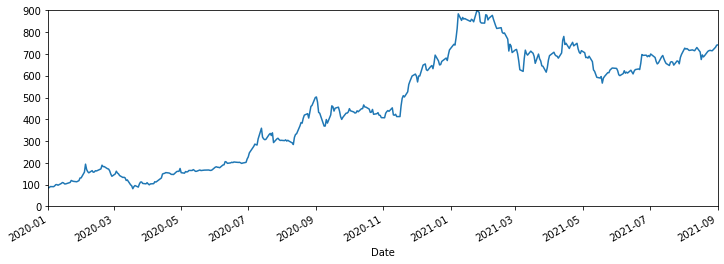

In [9]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=(0,900),figsize=(12,4))

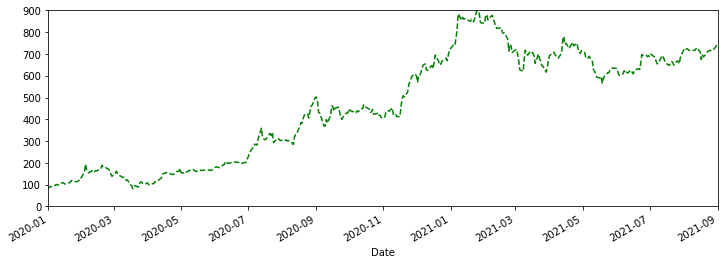

In [10]:
df_tesla['High'].plot(xlim=['2020-01-01','2021-09-01'],ylim=(0,900),figsize=(12,4),ls='--',c='green')

In [11]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']

In [12]:
share_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-08-26    708.309998
2021-08-27    705.000000
2021-08-30    714.719971
2021-08-31    733.000000
2021-09-01    734.080017
Name: Open, Length: 421, dtype: float64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

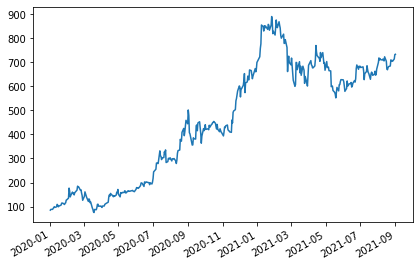

In [14]:
figure,axis=plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [15]:
df_tesla=df_tesla.reset_index()

In [16]:
 df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3046 non-null   datetime64[ns]
 1   Open       3046 non-null   float64       
 2   High       3046 non-null   float64       
 3   Low        3046 non-null   float64       
 4   Close      3046 non-null   float64       
 5   Adj Close  3046 non-null   float64       
 6   Volume     3046 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 166.7 KB


In [17]:
pd.to_datetime(df_tesla['Date'])

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3041   2022-07-28
3042   2022-07-29
3043   2022-08-01
3044   2022-08-02
3045   2022-08-03
Name: Date, Length: 3046, dtype: datetime64[ns]

In [18]:
df_tesla=df_tesla.set_index('Date',drop=True)

In [19]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [20]:
date = datetime(2021,11,21)

In [21]:
datetime.now()

datetime.datetime(2022, 8, 3, 13, 31, 34, 41905)

In [22]:
def mul_num(num1,num2):
  return num1 * num2
num1=20
num2 =30
start_time=datetime.now()
add_num =(num1,num2)
end_time =datetime.now()
print(end_time - start_time)

0:00:00.000292


In [23]:
date.day

21

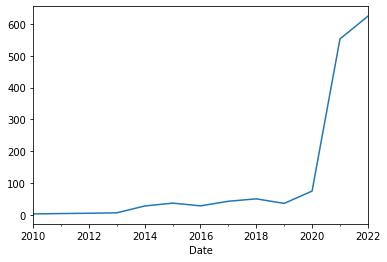

In [24]:
df_tesla.resample(rule='A').min()['Open'].plot()

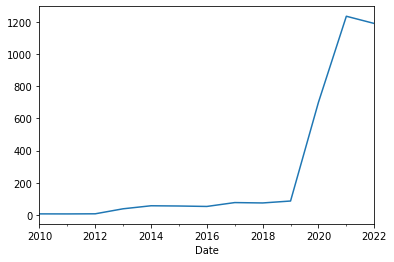

In [25]:
df_tesla.resample(rule='A').max()['Open'].plot()

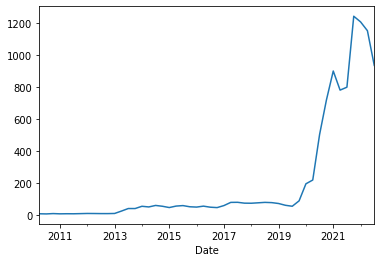

In [26]:
#Quaterly
df_tesla.resample(rule='QS').max()['High'].plot()

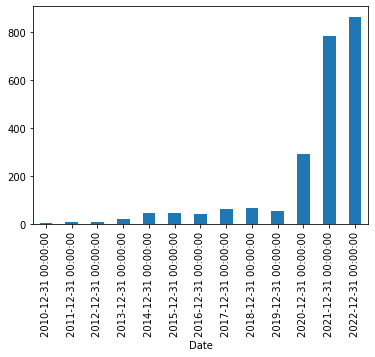

In [27]:
df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

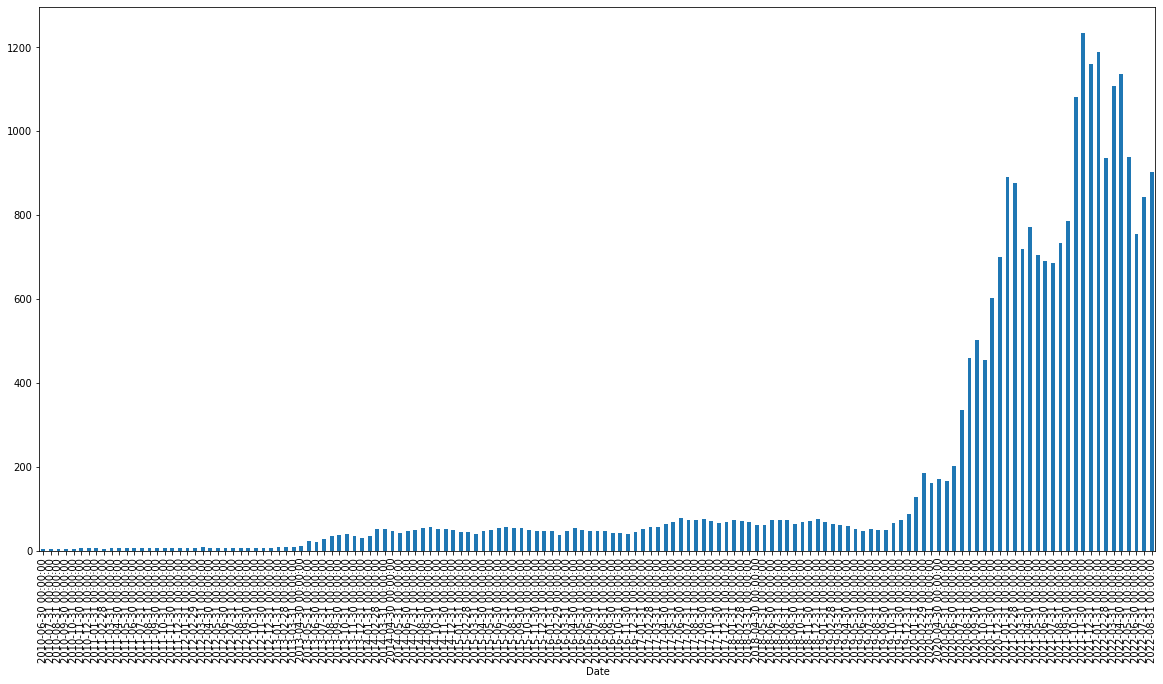

In [28]:
df_tesla['Open'].resample(rule='M').max().plot(kind='bar',figsize=(20,10))

In [29]:
df_tesla['Open'].rolling(11).max().head(20)

Date
2010-06-29      NaN
2010-06-30      NaN
2010-07-01      NaN
2010-07-02      NaN
2010-07-06      NaN
2010-07-07      NaN
2010-07-08      NaN
2010-07-09      NaN
2010-07-12      NaN
2010-07-13      NaN
2010-07-14    5.158
2010-07-15    5.158
2010-07-16    5.000
2010-07-19    4.600
2010-07-20    4.370
2010-07-21    4.370
2010-07-22    4.370
2010-07-23    4.370
2010-07-26    4.370
2010-07-27    4.370
Name: Open, dtype: float64

In [30]:
df_tesla['open: 30 days in rolling']=df_tesla['Open'].rolling(30).mean()

In [31]:
 df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume,open: 30 days in rolling
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,NaN
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,NaN
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,NaN
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,NaN
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,NaN


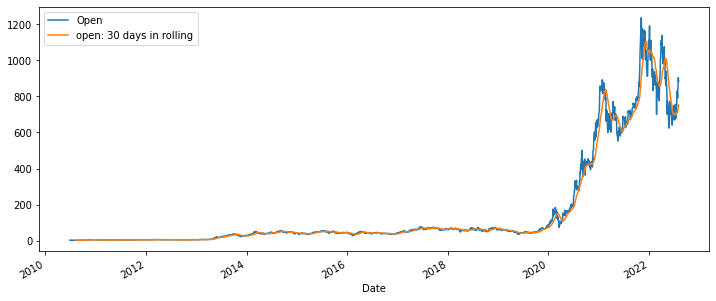

In [32]:
df_tesla[['Open','open: 30 days in rolling']].plot(figsize=(12,5))

cumulative moving Average

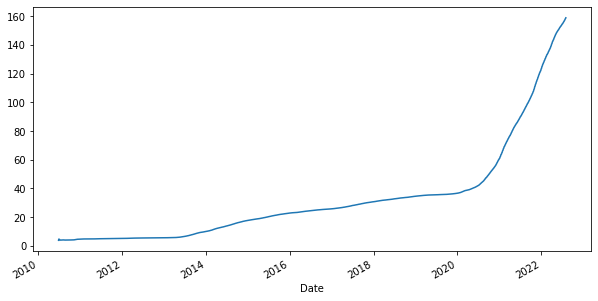

In [33]:
#CMA
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

In [34]:
# Exponetial moving avearage
#lets smoothing factor 0.1
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

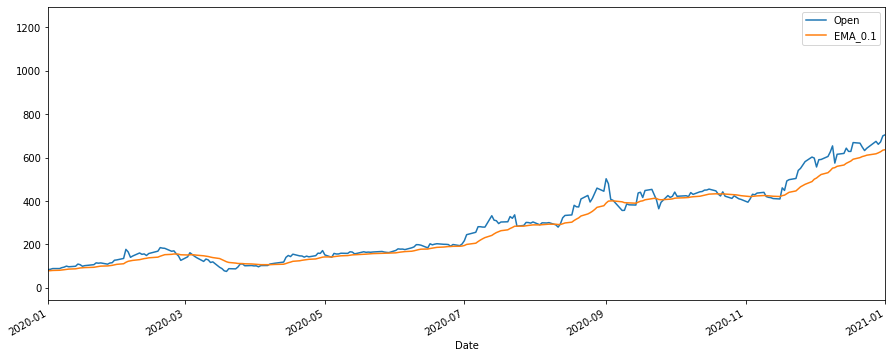

In [36]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

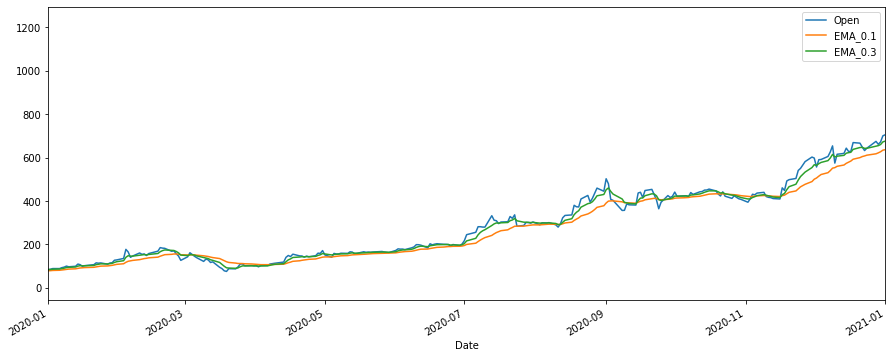

In [38]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

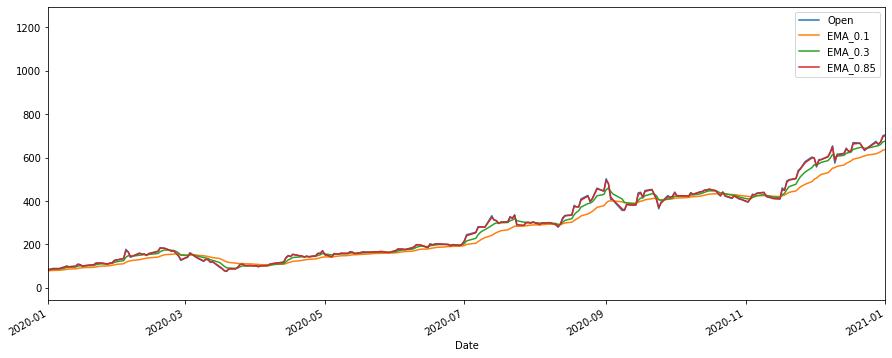

In [42]:
df_tesla['EMA_0.85']=df_tesla['Open'].ewm(alpha=0.85,adjust=False).mean()
df_tesla[['Open','EMA_0.1','EMA_0.3','EMA_0.85']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [44]:
df_tesla['EMA_5day']=df_tesla['Open'].ewm(span=5).mean()

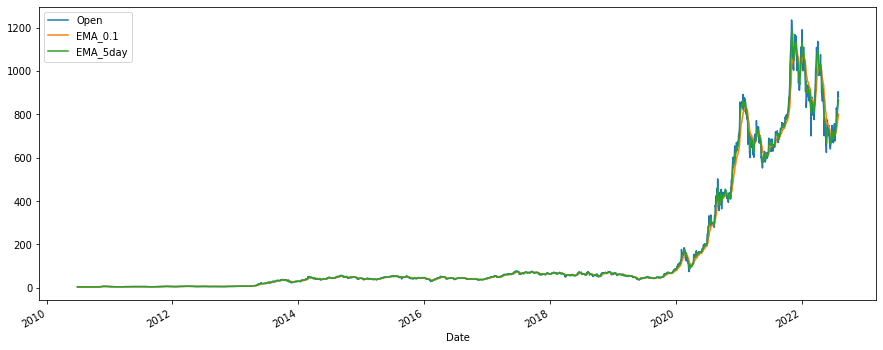

In [46]:
df_tesla[['Open','EMA_0.1','EMA_5day']].plot(figsize=(15,6))